# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Parse the JSON and retrieve data
    response = requests.get(city_url)
    city_weather = response.json()
    
    # Run an API request for each of the cities
    try:

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | aguas formosas
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | bom jesus
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | al bardiyah
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | juan de ayolas
Processing Record 11 of Set 1 | nuuk
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | fale old settlement
Processing Record 14 of Set 1 | ad dawadimi
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | bandarban
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | nantucket
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | port saint john's
Processing Record 21 of Set 1 | coruripe
Processing Record 22 of Set 1 | atafu

Processing Record 40 of Set 4 | visakhapatnam
Processing Record 41 of Set 4 | westport
Processing Record 42 of Set 4 | grande prairie
Processing Record 43 of Set 4 | syas'stroy
Processing Record 44 of Set 4 | melfort
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | kenora
Processing Record 47 of Set 4 | ahau
City not found. Skipping...
Processing Record 48 of Set 4 | mogadishu
Processing Record 49 of Set 4 | lockwood
Processing Record 0 of Set 5 | molchanovo
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | miyoshi
Processing Record 3 of Set 5 | howard springs
Processing Record 4 of Set 5 | batang
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | fort bragg
Processing Record 7 of Set 5 | east honolulu
City not found. Skipping...
Processing Record 8 of Set 5 | al kharijah
Processing Record 9 of Set 5 | san juan
Processing Record 10 of Set 5 | novokhopersk
Processing Record 11 of Set 5 | georgetown
Processing Record 12 

Processing Record 30 of Set 8 | saint-joseph
Processing Record 31 of Set 8 | san mariano
Processing Record 32 of Set 8 | jolo
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | kualakapuas
Processing Record 35 of Set 8 | namtsy
Processing Record 36 of Set 8 | ambodivoara
City not found. Skipping...
Processing Record 37 of Set 8 | bamboo flat
Processing Record 38 of Set 8 | chernyshevskiy
Processing Record 39 of Set 8 | ouro sogui


SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?q=ouro%20sogui&appid=b94cd3922224f8eb48df6659b31b309b (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1007)')))

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          374
Lat           374
Lng           374
Max Temp      374
Humidity      374
Cloudiness    374
Wind Speed    374
Country       374
Date          374
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.56,79,87,12.29,TF,1691611839
1,aguas formosas,-17.0822,-40.9358,296.59,66,97,2.19,BR,1691611901
2,iqaluit,63.7506,-68.5145,277.98,93,100,3.58,CA,1691611839
3,punta arenas,-53.1500,-70.9167,277.10,93,100,3.70,CL,1691611843
4,bethel,41.3712,-73.4140,302.71,52,0,6.17,US,1691611840


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.56,79,87,12.29,TF,1691611839
1,aguas formosas,-17.0822,-40.9358,296.59,66,97,2.19,BR,1691611901
2,iqaluit,63.7506,-68.5145,277.98,93,100,3.58,CA,1691611839
3,punta arenas,-53.1500,-70.9167,277.10,93,100,3.70,CL,1691611843
4,bethel,41.3712,-73.4140,302.71,52,0,6.17,US,1691611840


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

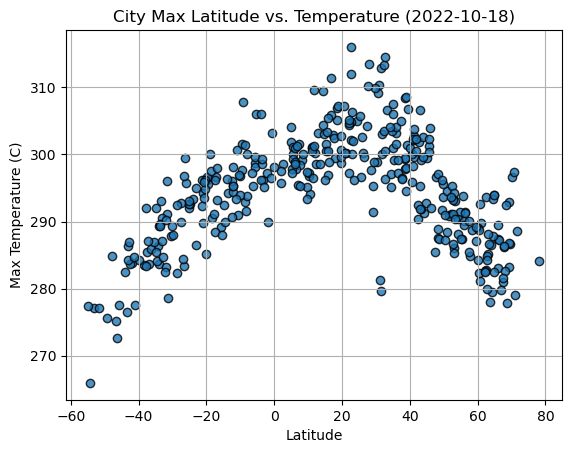

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

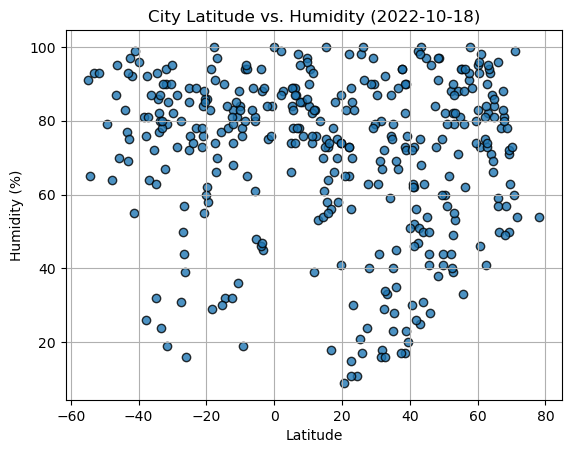

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

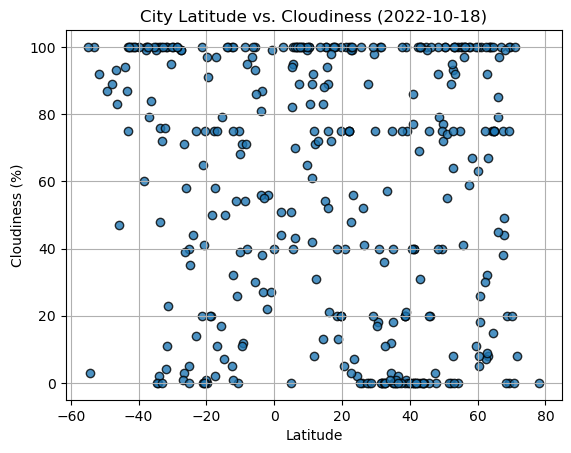

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

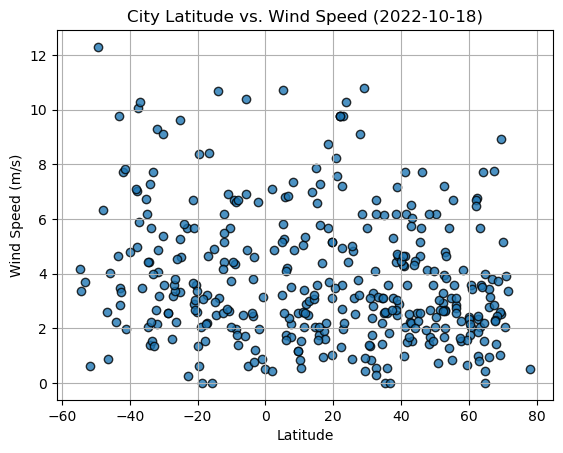

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    r_squared = rvalue**2
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the regression line equation and r squared value
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords="axes fraction")

    # Incorporate other graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Display plot
    print(f"The r-value is: {r_squared}")
    plt.show()


In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,277.98,93,100,3.58,CA,1691611839
4,bethel,41.3712,-73.4140,302.71,52,0,6.17,US,1691611840
6,aykhal,66.0000,111.5000,287.33,59,85,2.76,RU,1691611867
7,al bardiyah,31.7561,25.0865,300.00,67,0,2.82,LY,1691611903
10,nuuk,64.1835,-51.7216,279.49,87,75,7.72,GL,1691611764


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.56,79,87,12.29,TF,1691611839
1,aguas formosas,-17.0822,-40.9358,296.59,66,97,2.19,BR,1691611901
3,punta arenas,-53.1500,-70.9167,277.10,93,100,3.70,CL,1691611843
5,bom jesus,-9.0744,-44.3586,307.89,19,12,4.35,BR,1691611902
8,adamstown,-25.0660,-130.1015,291.97,72,40,9.61,PN,1691611843


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4395130146753742


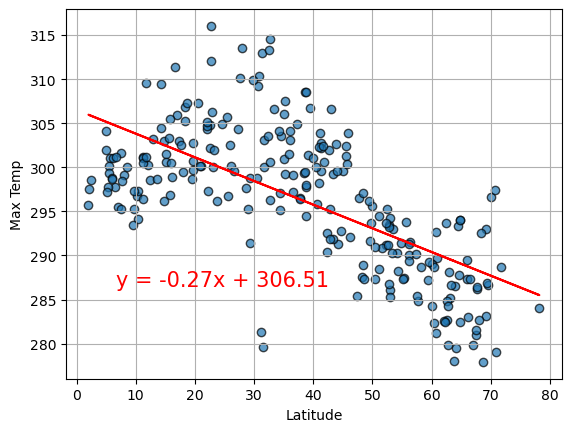

In [109]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                              northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temp",
                              (0.1, 0.25)
                             )


The r-value is: 0.6730112523512899


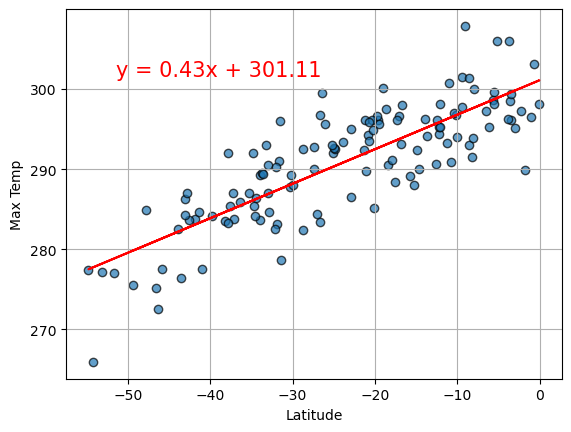

In [110]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                              southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temp",
                              (0.1, 0.82)
                             )

**Discussion about the linear relationship:** The linear regression on Northern Hemisphere data has a weak correlation, and the linear regression on the southern hemisphere data has moderate correlation. This may be due to the geography of both hemispheres where the northern hemisphere is more diverse due to various landmasses and different elevations and climate zones. These variations can lead to a wider range of temperature values in the northern hemisphere thus giving a weaker correlation. The southern hemisphere however, is ocean dominant and so having a moderate effect on the tempurature due to water's heat retaining capacity, thus leading to a more moderate correlation with tempurature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 4.7926634034000325e-05


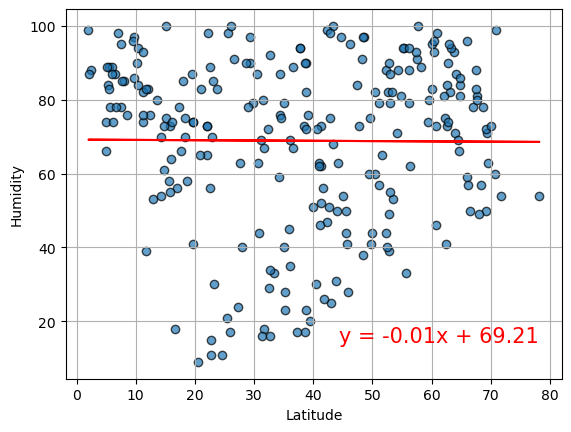

In [111]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                      northern_hemi_df["Humidity"], 
                      "Latitude", "Humidity",
                      (0.55, 0.1)
                     )

The r-value is: 0.006371472389594547


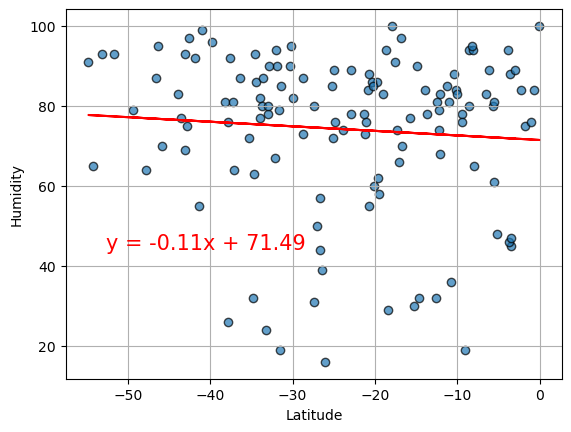

In [112]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                      southern_hemi_df["Humidity"],
                      "Latitude", "Humidity",
                      (0.08, 0.35)
                     )

**Discussion about the linear relationship:** There is no correlation between the northern and southern hemisphers humidity rates. This shows that humidity does not depend on latitude alone but rather on other factors instead. Such factors could be: air circulation, elevation, ocean influences, and season variations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007717633321036385


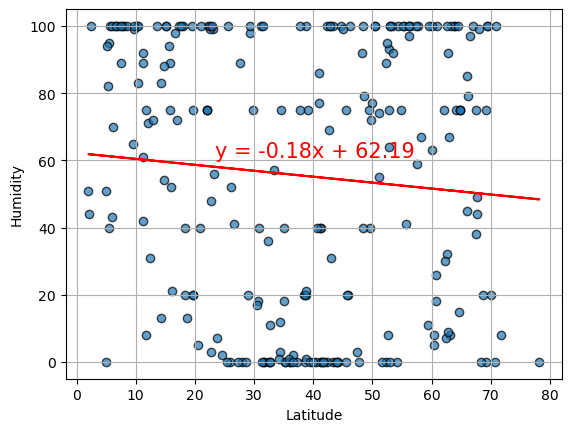

In [113]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                      northern_hemi_df["Cloudiness"], 
                      "Latitude", "Humidity",
                      (0.3, 0.6)
                     )

The r-value is: 0.06266302592798577


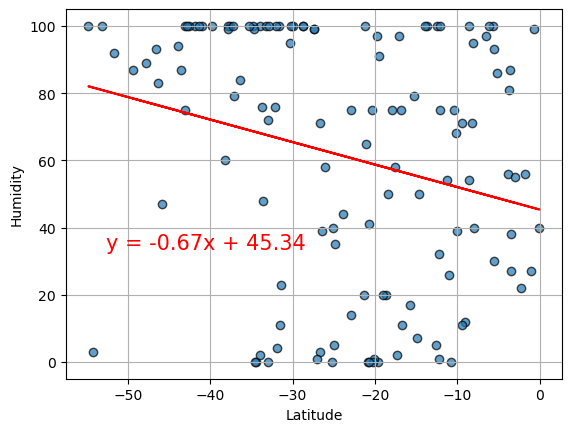

In [114]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                      southern_hemi_df["Cloudiness"],
                      "Latitude", "Humidity",
                      (0.08, 0.35)
                     )

**Discussion about the linear relationship:** Again, there is no correlation between cloudiness within the northern and southern hemisphers. This shows that cloudiness does not depend on latitude alone but rather on other factors instead. Such factors could be: Proximity to oceans, geography, ocean currents, and local climate zones.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02671449478988324


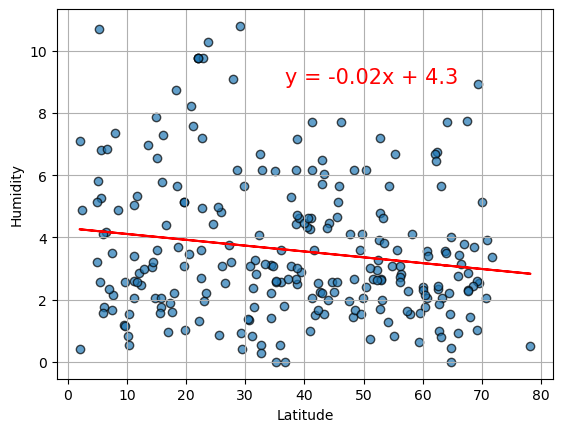

In [119]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                      northern_hemi_df["Wind Speed"], 
                      "Latitude", "Humidity",
                      (0.46, 0.8)
                     )

The r-value is: 0.03350697745325745


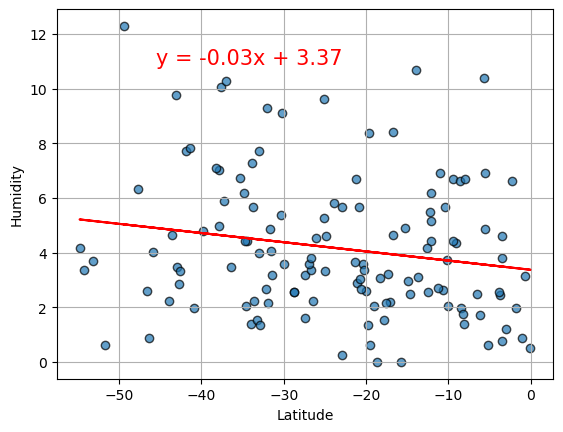

In [124]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                      southern_hemi_df["Wind Speed"],
                      "Latitude", "Humidity",
                      (0.2, 0.85)
                     )

**Discussion about the linear relationship:** Once again, there seems to be no correlation between the Wind Speeds within the northern and southern hemisphers. This shows that wind speed does not depend on latitude alone but rather on other factors instead. Such factors could be:Geological features, oceans, the coriolis effect, and atmospheric circulation.